Presented by Pavithra A


G-Mail a30128276@gmail.com

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Corona_NLP.csv',encoding = 'latin1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
28662,32461,77413,"Missouri, USA",05-04-2020,Health insurance premiums could rise up to 40 ...,Positive
28663,32462,77414,I'M STILL THE ONLY VICTIM,05-04-2020,The says grandparent and family emergency scam...,Extremely Negative
28664,32463,77415,"Miami, Florida",05-04-2020,@ErickMarrero_ ....and that's just from Covid-...,Positive
28665,32464,77416,#worldwide,05-04-2020,If u cant find TP ( #toiletPaper ) at the stor...,Neutral


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28667 entries, 0 to 28666
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       28667 non-null  int64 
 1   ScreenName     28667 non-null  int64 
 2   Location       22634 non-null  object
 3   TweetAt        28667 non-null  object
 4   OriginalTweet  28667 non-null  object
 5   Sentiment      28666 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,UserName,ScreenName
count,28667.00000,28667.00000
mean,18132.00000,63084.00000
std,8275.59442,8275.59442
min,3799.00000,48751.00000
25%,10965.50000,55917.50000
50%,18132.00000,63084.00000
75%,25298.50000,70250.50000
max,32465.00000,77417.00000


In [ ]:
df.shape

(28667, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
24-03-2020    1480
26-03-2020    1277
02-04-2020     954
03-04-2020     810
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
29-03-2020     125
30-03-2020      87
28-03-2020      23
05-04-2020       7
Name: TweetAt, dtype: int64

In [ ]:
df.Location.value_counts()

London                 400
London, England        397
United States          335
New York, NY           267
United Kingdom         264
                      ... 
Perth - New Holland      1
Anchorage, Alaska        1
Enderby, England         1
Camberley                1
backa town               1
Name: Location, Length: 9233, dtype: int64

In [ ]:
df.Sentiment.value_counts()

Positive              7898
Negative              7070
Neutral               5197
Extremely Positive    4471
Extremely Negative    4030
Name: Sentiment, dtype: int64

Exploratory Data Analysis

Having a look at some of the Tweets that have been made and the Sentiments that they signify


In [ ]:
df[df['Sentiment'] == 'Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
28656,32455,77407,lahore pakistan,04-04-2020,Instead of giving financial aid that is close ...,Positive
28657,32456,77408,"Atlanta, GA",04-04-2020,Choose your fighter https://t.co/l4i3FWP0Fl,Positive
28661,32460,77412,i like anime too not just kpop,05-04-2020,"me, at work, when people ask if we have toilet...",Positive
28662,32461,77413,"Missouri, USA",05-04-2020,Health insurance premiums could rise up to 40 ...,Positive


In [ ]:
df[df['Sentiment'] == 'Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

In [ ]:
df[df['Sentiment'] == 'Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
28647,32446,77398,"Chicago, IL",04-04-2020,Very difficult to slow the online shopping dur...,Negative
28648,32447,77399,"Vancouver, British Columbia",04-04-2020,Supervalu on commercial drive is #pricegouging...,Negative
28650,32449,77401,"Studio City, California",04-04-2020,A 4.9-magnitude earthquake shook the area near...,Negative
28652,32451,77403,Seattle,04-04-2020,Be a good human. Our actions have an impact on...,Negative


In [ ]:
df[df['Sentiment'] == 'Negative'].loc[28,'OriginalTweet']

'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.co/MdMmoBttOP\r\r\n#COVID19 #CovidNYC'

In [ ]:
df[df['Sentiment'] == 'Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
28617,32416,77368,NaN,04-04-2020,With these airline ticket prices IÂm about to...,Neutral
28618,32417,77369,HARRISBURG,04-04-2020,I canÂt believe the prices today for cleaning...,Neutral
28628,32427,77379,NaN,04-04-2020,@bet2win10 I will use it stock food in the hou...,Neutral
28659,32458,77410,U.S.A,04-04-2020,Major #ConsumerProtections Announced in Respon...,Neutral


In [ ]:
df[df['Sentiment'] == 'Neutral'].loc[7,'OriginalTweet']

"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"

In [ ]:
df[df['Sentiment'] == 'Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
28631,32430,77382,somewhere out there?,04-04-2020,Shame on @AirCanada for this excuse they are g...,Extremely Positive
28633,32432,77384,"Ontario, Canada",04-04-2020,The 08-09 GFC ÂbailoutsÂ did not cause infla...,Extremely Positive
28636,32435,77387,NaN,04-04-2020,@MarksCanada can you please honour this card f...,Extremely Positive
28645,32444,77396,Dubai- UAE,04-04-2020,Enjoy the online shopping and #StayAtHome ? We...,Extremely Positive


In [ ]:
df[df['Sentiment'] == 'Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
df[df['Sentiment'] == 'Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
28640,32439,77391,"East, The Globe",04-04-2020,China's largest online shopping mall turned bl...,Extremely Negative
28644,32443,77395,"Baltimore, MD",04-04-2020,@realDonaldTrump Why Naturally so important to...,Extremely Negative
28649,32448,77400,"Abuja, Nigeria",04-04-2020,Same Nigerians that believes standing in the s...,Extremely Negative
28658,32457,77409,NaN,04-04-2020,I will usually buy a carton or two of cat food...,Extremely Negative


In [ ]:
df[df['Sentiment'] == 'Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

Handling Null values

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['Location'].isnull().sum()

6033

Heat map for the missing values

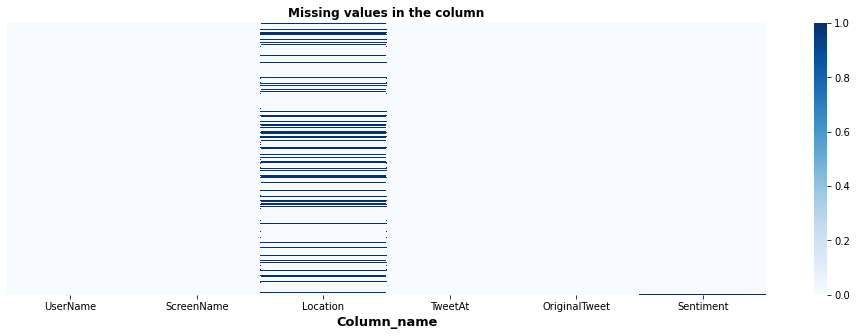

In [ ]:
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar = True,yticklabels = False,cmap ='Blues')
plt.xlabel('Column_name',weight = 'bold',size = 13)
plt.title("Missing values in the column",weight = 'bold')
plt.show()

In [ ]:
df.dropna(subset=['Location'], how='all', inplace=True)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


We have REMOVED all 'NaN' rows from the 'Location' column.

Though we haveThe 'Location' column is not useful for our sentiment analysis.</b>

Top 10 Locations of Tweets generated

In [ ]:
top10_locations_of_tweet = df['Location'].value_counts().head(10)
sns.set(rc = {"figure.figsize" : (12,8)})
sns.set_style('white')

In [ ]:
top10_locations_of_tweet.head(10)

London             400
London, England    397
United States      335
New York, NY       267
United Kingdom     264
Washington, DC     250
Los Angeles, CA    204
UK                 194
India              167
Australia          164
Name: Location, dtype: int64

In [ ]:
top10_locations_of_tweet_df = pd.DataFrame(top10_locations_of_tweet)
top10_locations_of_tweet_df.reset_index(inplace = True)
top10_locations_of_tweet_df.rename(columns = {'index':'Location','Location':'Tweet_count'},inplace = True)
top10_locations_of_tweet_df

,Location,Tweet_count
0,London,400
1,"London, England",397
2,United States,335
3,"New York, NY",267
4,United Kingdom,264
5,"Washington, DC",250
6,"Los Angeles, CA",204
7,UK,194
8,India,167
9,Australia,164


[Text(0, 0, 'London'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Australia')]

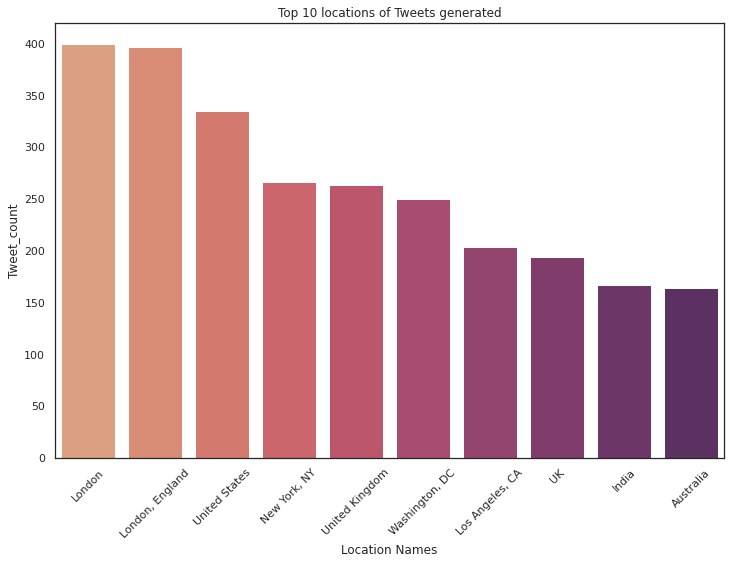

In [ ]:
barplt = sns.barplot(x = 'Location',y = 'Tweet_count',data = top10_locations_of_tweet_df,
                      palette = 'flare')
barplt.set_title("Top 10 locations of Tweets generated")
barplt.set_ylabel("Tweet_count")
barplt.set_xlabel("Location Names")
barplt.set_xticklabels(barplt.get_xticklabels(),rotation = 45)

Generating a SENTIMENT COUNTPLOT for better visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


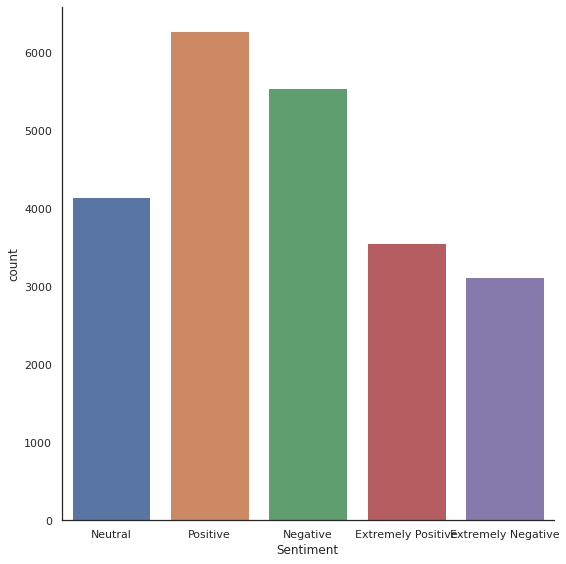

In [ ]:
sns.catplot("Sentiment", data=df, kind="count", height=8)
sns.set(font_scale = 1.1)

In [ ]:
df.TweetAt.value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
24-03-2020    1167
26-03-2020    1025
02-04-2020     779
03-04-2020     656
04-04-2020     615
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
29-03-2020      95
30-03-2020      65
28-03-2020      19
05-04-2020       6
Name: TweetAt, dtype: int64